## Assignment - Lab07

## Nikhitha Elezebeth Baby - 21BDA14

Have you come across Grid Search Cross Validation? Fit any two models covered in previous classes and optimize them using Grid search CV.

Importing Necessary Files

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#library file for train test split 
from sklearn.model_selection import train_test_split

#library files for model building 
import statsmodels
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Importing the Dataset

In [2]:
df = pd.read_csv('C:/Users/HP/Downloads/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Shape of the Dataset

In [3]:
print ('The Number of Rows present in the Dataset is \t\t',df.shape[0])
print ('The Number of Columns present in the Dataset is \t',df.shape[1])

The Number of Rows present in the Dataset is 		 284807
The Number of Columns present in the Dataset is 	 31


Checking the Datatypes of the Dataset

In [4]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Checking for the Missing Values

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Data Handling

In [6]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
print('The Total Transaction in the Dataset is \t:',len(df['Class']))
print('\nThe Genuine Transaction in the Dataset is \t:',df['Class'].value_counts()[0])
print('\nThe Fraud Transaction in the Dataset is \t:',df['Class'].value_counts()[1])

The Total Transaction in the Dataset is 	: 284807

The Genuine Transaction in the Dataset is 	: 284315

The Fraud Transaction in the Dataset is 	: 492


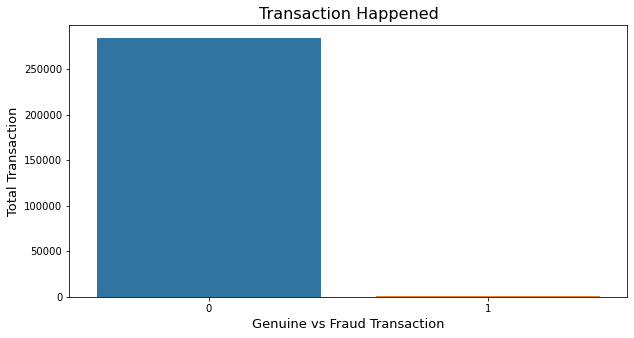

In [8]:
plt.figure(figsize=(10,5))
sns.countplot(df['Class'])
plt.title('Transaction Happened',size = 16)
plt.xlabel('Genuine vs Fraud Transaction', size = 13)
plt.ylabel('Total Transaction', size = 13)
plt.show()

Transaction Amount from the Dataset

In [9]:
df.Amount.value_counts()

1.00      13688
1.98       6044
0.89       4872
9.99       4747
15.00      3280
          ...  
438.10        1
152.29        1
156.45        1
724.44        1
102.77        1
Name: Amount, Length: 32767, dtype: int64

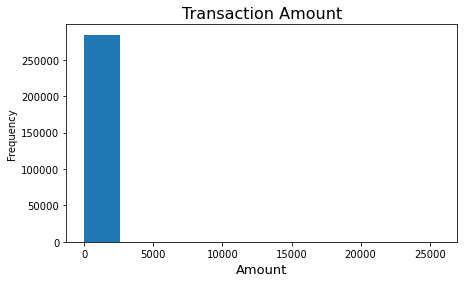

In [10]:
plt.figure(figsize=(7,4))
df['Amount'].plot(kind= 'hist')
plt.title('Transaction Amount', size =16)
plt.xlabel('Amount', size = 13)
plt.show()

In [11]:
print('The Minimum amount of Transaction happened is\t:', df.Amount.min())
print('The Minimum amount of Transaction happened is\t:', df.Amount.max())

The Minimum amount of Transaction happened is	: 0.0
The Minimum amount of Transaction happened is	: 25691.16


In [12]:
df.Time.value_counts()

163152.0    36
64947.0     26
68780.0     25
3767.0      21
3770.0      20
            ..
81790.0      1
54289.0      1
37651.0      1
112892.0     1
119665.0     1
Name: Time, Length: 124592, dtype: int64

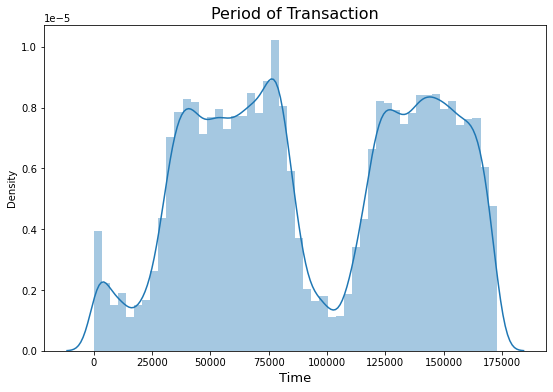

In [13]:
plt.figure(figsize=(9,6))
sns.distplot(df['Time'])
plt.title('Period of Transaction', size=16)
plt.xlabel('Time',size = 13)
plt.show()

Dropping the Time Column

In [14]:
df.drop(['Time'],axis = 1, inplace = True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Dropping the Duplicates

In [15]:
print('The rows and columns in the dataset before Dropping the Duplicates', df.shape)

df.drop_duplicates(inplace= True)

print('The rows and columns in the dataset after Dropping the Duplicates',df.shape)

The rows and columns in the dataset before Dropping the Duplicates (284807, 30)
The rows and columns in the dataset after Dropping the Duplicates (275663, 30)


Scaling the Dataset

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
amount = df['Amount'].values
df['Amount'] = sc.fit_transform(amount.reshape(-1, 1))

In [17]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.233169,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.347092,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.137702,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.130015,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.081308,0


Train - Test Split of the Dataset

In [18]:
x = df.drop('Class', axis = 1)
y = df['Class']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1)

print("The shape of X_train is:",X_train.shape)
print("The shape of X_test is:",X_test.shape)
print("The shape of y_train is:",y_train.shape)
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (206747, 29)
The shape of X_test is: (68916, 29)
The shape of y_train is: (206747,)
The shape of y_test is: (68916,)


## Decision Tree Calssifier

In [20]:
dtc=DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
dtc_pred=dtc.predict(X_test)

In [21]:
dtc_acc = accuracy_score(y_test, dtc_pred)
print('The Accuracy obtained from the Decision Tree Classifier Model is',dtc_acc)

The Accuracy obtained from the Decision Tree Classifier Model is 0.9989987811248476


In [22]:
confusion_matrix(y_test, dtc_pred)

array([[68763,    25],
       [   44,    84]], dtype=int64)

In [23]:
f1_score(y_test,dtc_pred, average="micro")

0.9989987811248476

## GRID SEARCH CV IMPLEMENTATION

In [24]:
grid = { 
    'splitter': ['best', 'random'],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,9,10,12,14],
    'criterion' :['gini', 'entropy'],
    'random_state' : [18]
}

In [25]:
dtc_cv = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=grid, cv= 5)
dtc_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 12, 14],
                         'max_features': ['sqrt', 'log2'], 'random_state': [18],
                         'splitter': ['best', 'random']})

In [26]:
dtc_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'sqrt',
 'random_state': 18,
 'splitter': 'best'}

In [27]:
dtc = DecisionTreeClassifier(criterion='gini', max_depth=5, max_features='sqrt', splitter='random' , random_state=18)

In [28]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=18,
                       splitter='random')

In [29]:
dtc_pred=dtc.predict(X_test)

In [30]:
confusion_matrix(y_test, dtc_pred)

array([[68761,    27],
       [   69,    59]], dtype=int64)

In [31]:
f1_score(y_test,dtc_pred, average="micro")

0.998606999825875

In [32]:
dtc_acc = accuracy_score(y_test, dtc_pred)
print('The Accuracy obtained from the Decision Tree Classifier Model is',dtc_acc)

The Accuracy obtained from the Decision Tree Classifier Model is 0.998606999825875


## Random Forest Classifier 

In [33]:
rfc=RandomForestClassifier(n_estimators = 100, random_state = 18).fit(X_train, y_train) 
rfc_pred= rfc.predict(X_test)

In [34]:
rfc_acc = accuracy_score(y_test, rfc_pred)
print('The Accuracy obtained from the Random Forest Classifier Model is',rfc_acc)

The Accuracy obtained from the Random Forest Classifier Model is 0.9994195832607813


In [35]:
confusion_matrix(y_test, rfc_pred)

array([[68784,     4],
       [   36,    92]], dtype=int64)

In [36]:
f1_score(y_test,rfc_pred, average="micro")

0.9994195832607813

## GRID SEARCH CV IMPLEMENTATION

In [37]:
grid = { 
    'n_estimators': [200,300,400,500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy'],
    'random_state' : [18]
}

In [41]:
rfc_cv = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid, cv= 5)
rfc_cv.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
rfc_cv.best_params_

In [ ]:
rfc = RandomForestClassifier(n_estimators = 200, max_depth=4, max_features='sqrt' , random_state = 18).fit(X_train, y_train)

In [ ]:
rfc_pred= rfc.predict(X_test)

In [ ]:
confusion_matrix(y_test, rfc_pred)

In [ ]:
accuracy_score(y_test, rfc_pred)

In [ ]:
f1_score(y_test,rfc_pred, average="micro")